In [39]:
import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data_Frame = pd.read_csv('..\\diamonds.csv')
data_Frame

In [41]:
data_Frame

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [42]:
features = data_Frame.drop(['cut','Unnamed: 0',], axis=1)

In [43]:
features.head()

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
data_Frame['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [45]:
features['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [46]:
features['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [47]:
y= data_Frame['cut'].map({'Ideal':4, 'Premium':3, 'Very Good':2, 'Good':1, 'Fair':0})

In [48]:
features['color']= data_Frame['color'].map({'E': 0, 'I': 1, 'J': 2, 'H': 3, 'F': 4, 'G': 5, 'D': 6})

In [49]:
features['clarity']= data_Frame['clarity'].map({'SI2': 0, 'SI1': 1, 'VS1': 2, 'VS2': 3, 'VVS2': 4, 'VVS1': 5, 'I1': 6 ,'IF':7})

In [50]:
features.head()

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,0,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
features = features.to_numpy()
y = y.to_numpy()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

In [ ]:
[xtrain,xtest,ytrain,ytest]=train_test_split(x_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [54]:
knn = KNeighborsClassifier(n_neighbors=33)

In [55]:
pd.DataFrame(xtrain).isnull().sum().sum()



np.int64(0)

In [56]:
knn.fit(xtrain, ytrain)

,n_neighbors,33
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
predictions = knn.predict(xtest)

In [58]:
sum(predictions == ytest)/len(ytest)

np.float64(0.6934556915090841)

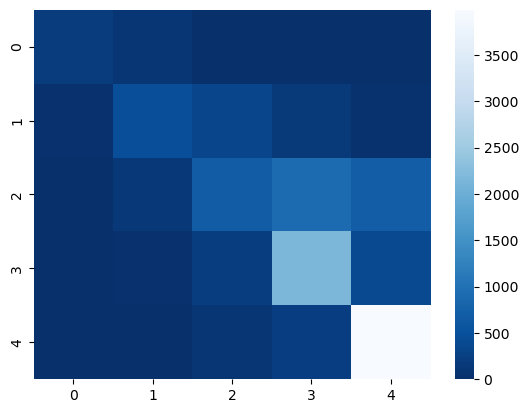

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(ytest,predictions)
# print(CM)
sns.heatmap(CM,cmap='Blues_r')
plt.show()